<a href="https://colab.research.google.com/github/jisoolee11/school/blob/main/machine_learning/chapter2_housing_w3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>200310 기계학습 2장 실습

## 설정
파이썬 버전을 확정하고, 관련된 패키지를 임포트 한다.

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# 그래프 그리기
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그래프 저장할 경로 지정하기
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장하는 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 데이터 가져오기

In [ ]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# 데이터를 추출하는 함수
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
# 파일을 내려받고 압축풀기
fetch_housing_data()

In [ ]:
import pandas as pd

# 데이터를 읽어 들이는 함수 
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
# 데이터 확인하기(앞부분 일부만)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# ocean_proximity(범주형) 분석
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# 숫자형 특성의 요약 정보
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


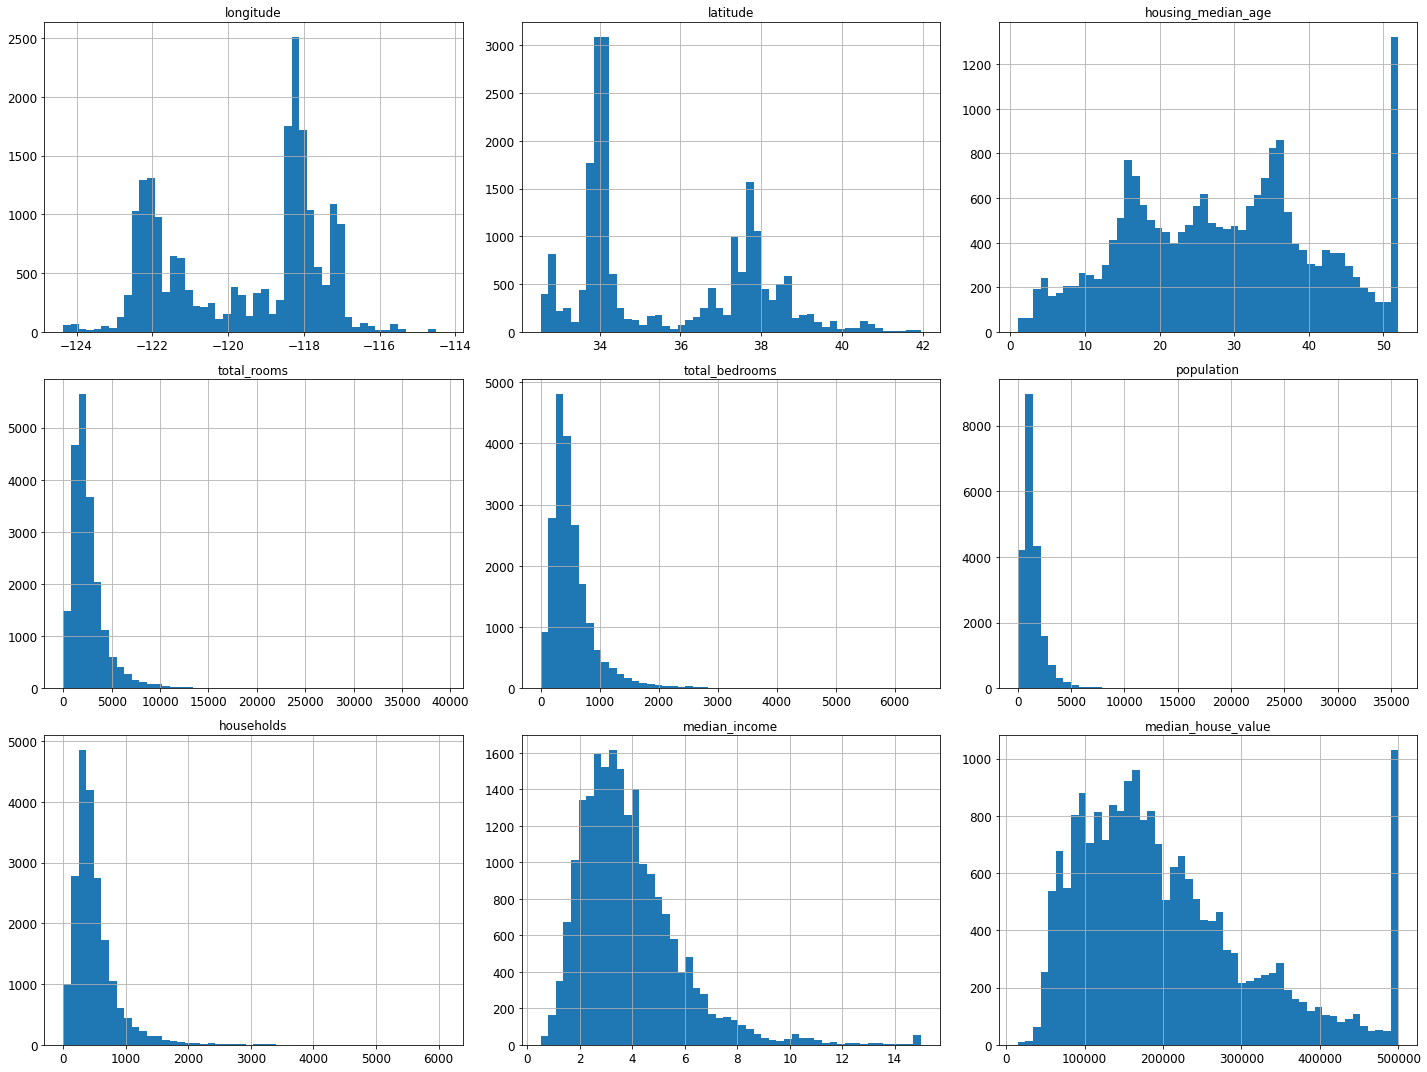

In [ ]:
# 그래프화
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
# seed값 고정
np.random.seed(42)

In [ ]:
# 트레인셋 테스트셋 분리
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# train 80%, test 20%
train_set, test_set =split_train_test(housing, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [ ]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [ ]:
# split_train_test함수 대신 sklearn을 사용하면 더 간단하게 코드를 짤 수 있다.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
# copy를 사용해서 train_set 복사
housing = train_set.copy()

## 데이터 시각화

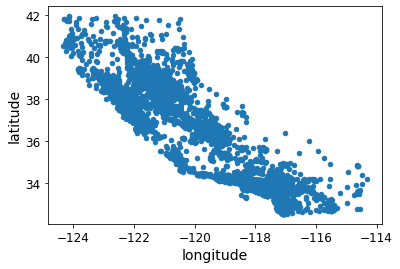

In [ ]:
# 모든 구역을 산점도로 만들어 데이터로 시각화
housing.plot(kind='scatter', x='longitude', y='latitude')

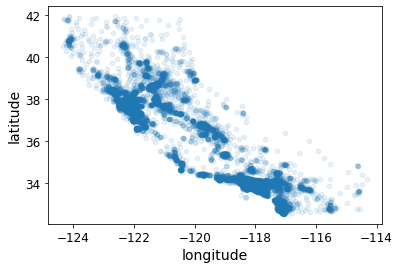

In [ ]:
# alpha 옵션을 주어 데이터 포인트가 밀집된 영역을 보여주기
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

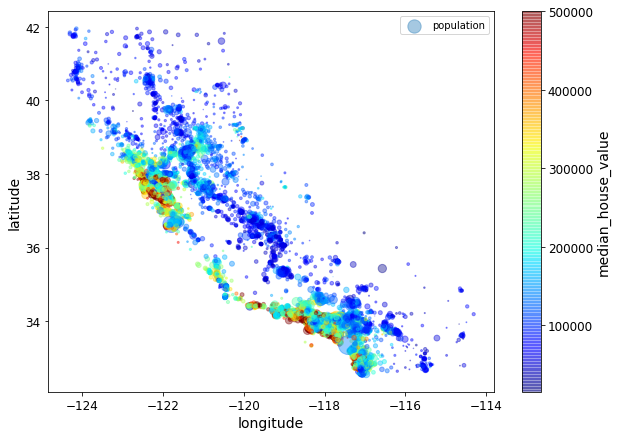

In [ ]:
# s = 구역의 인구를 나타냅니다.
# c = 색상은 가격을 나타냅니다. jet = 파란색(낮은 가격) -> 빨간색(높은가격)을 나타내는 컬러 맵
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend() # 여러 그래프를 같이 출력

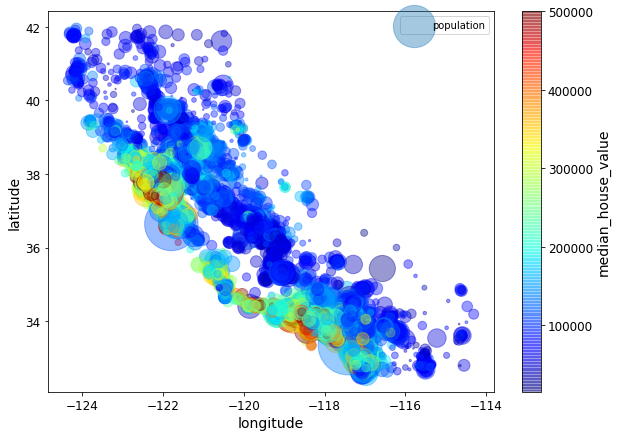

In [ ]:
# s=housing["population"]/10
# s 값이 커질 수록 원의 반지름 크기가 커집니다.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/10, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

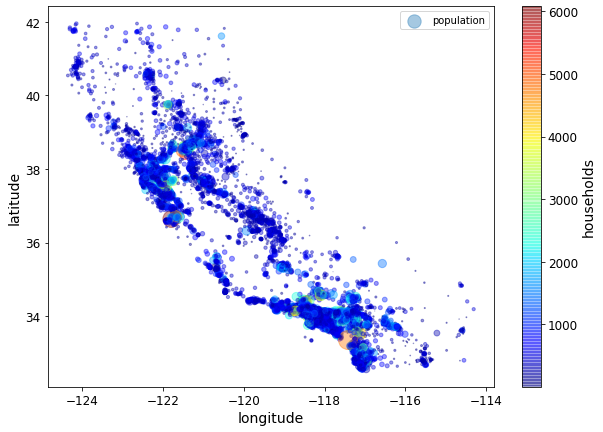

In [ ]:
# c="households" households를 나타냅니다.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="households", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

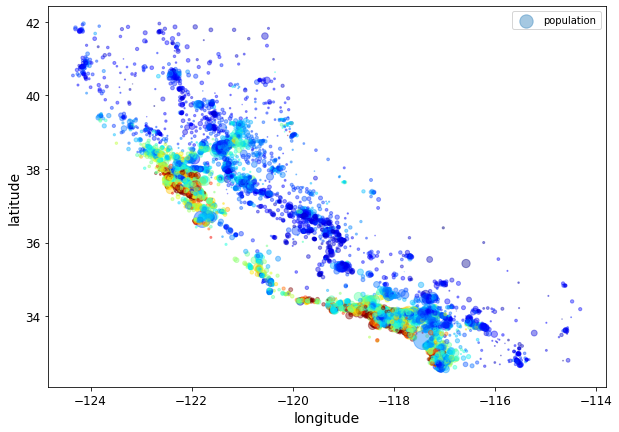

In [ ]:
# clorbar=False 오른쪽 컬러바가 없어졌습니다.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False,
             sharex=False)
plt.legend()

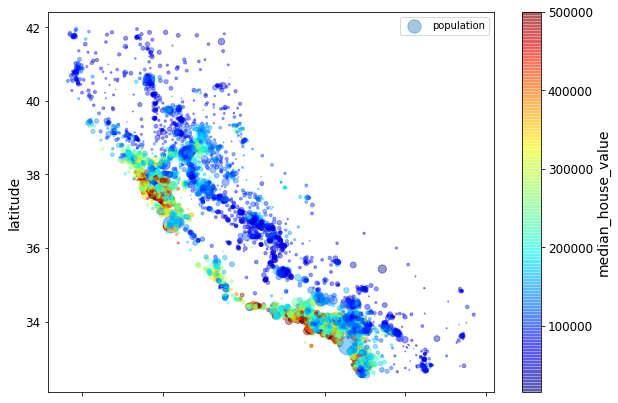

In [ ]:
# sharex=True 아래에 경도가 사라졌습니다.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=True)
plt.legend()

In [ ]:
# 상관관계 조사
corr_matrix = housing.corr()

In [ ]:
# 1, -1에 가까울 수록 강한 상관관계를 가지며 0에 가까울 수록 선형적인 상관관계가 없습니다
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6688c89f10>,
      dtype=object)

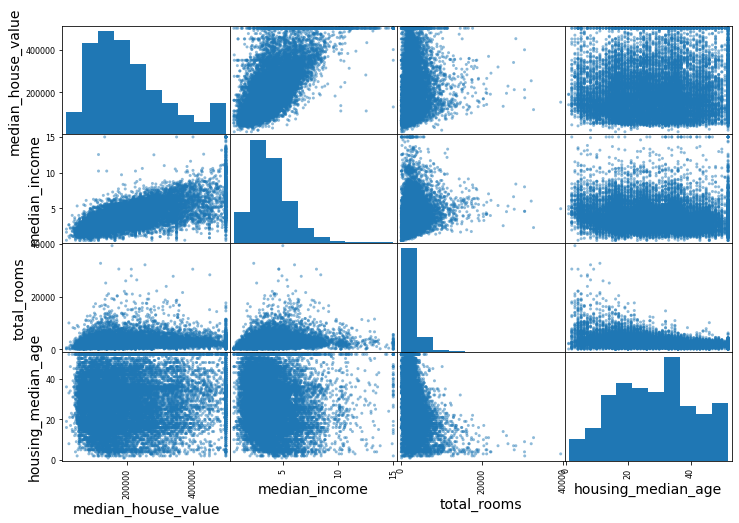

In [ ]:
# 시각화
# 왼쪽 위에서 오른쪽 아래로 내려가는 선 기준으로 대칭(같은 그래프)이다.
# median income이 가장 선형적인 그래프를 보여준다. 그러므로 median_house_value와 가장 관계가 있다고 예상할 수 있다.
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

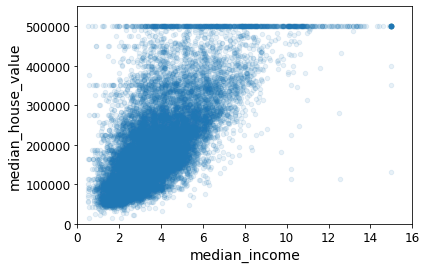

In [ ]:
# 위쪽으로 향하고 포인트들이 너무 따로 퍼져있지 않다. -> 상관관계가 강하다.
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [ ]:
# 객체끼리의 사칙연산 반드시 갯수가 같아야 한다.
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms _per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
housing.head() # housing데이터의 앞부분 일부만 보여준다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms _per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [ ]:
# 상관관계 조사
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms _per_room         -0.257419
Name: median_house_value, dtype: float64

## 알고리즘 머신러닝을 위한 데이터 준비

null값이 테스트셋에 다 몰려있었기 때문에 seed값을 재설정 했습니다.
seed 값을 재설정할 경우 데이터를 다시 불러오거나 위에있는 seed값을 변경하고 런타임 초기화 시켜서 다시 시작합니다.

In [ ]:
# 데이터를 볼러옵니다
housing = load_housing_data()

In [ ]:
# seed값을 고정시킵니다.
np.random.seed(789)

In [ ]:
# 트레인셋, 테스트셋을 나눕니다
train_set, test_set =split_train_test(housing, 0.2)

In [ ]:
housing = train_set.drop("median_house_value", axis=1) #훈련 세트를 위해 레이블 삭제
housing_labels = train_set["median_house_value"].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
851,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,NEAR BAY
11666,-118.01,33.85,29.0,2064.0,447.0,1265.0,400.0,3.8864,<1H OCEAN
3877,-118.50,34.21,36.0,1254.0,229.0,629.0,245.0,4.9643,<1H OCEAN
2573,-124.11,40.81,23.0,959.0,212.0,425.0,175.0,2.5536,NEAR OCEAN
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,INLAND


In [ ]:
housing_labels.head()

851      214700.0
11666    209300.0
3877     236100.0
2573      96100.0
3330     112500.0
Name: median_house_value, dtype: float64

In [ ]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,340900.0,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,231700.0,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,133800.0,INLAND
13925,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND


In [ ]:
# option1 전체 특성을 삭제합니다.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
# option2 해당 구역을 제거합니다.
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
16879,-122.39,37.60,34.0,707.0,381.0,156.0,4.3750,340900.0,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,1865.0,771.0,2.7139,231700.0,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,1563.0,516.0,5.4337,133800.0,INLAND
13925,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,48500.0,INLAND
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147,158700.0,INLAND


In [ ]:
# option3 어떤 값으로 채웁니다.
# 훈련셋에서 중간 값을 계산하고 누락된 값을 이 값으로 채워 넣어야 합니다.
# nan 데이터를 어떤 값으로 채운 후에 실제 데이터프레임에 저장할지를 결정하는 변수 -> inplace=True로 설정
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16879,-122.39,37.60,34.0,707.0,432.0,381.0,156.0,4.3750,340900.0,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,432.0,1865.0,771.0,2.7139,231700.0,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,432.0,1563.0,516.0,5.4337,133800.0,INLAND
13925,-114.59,34.83,41.0,812.0,432.0,375.0,158.0,1.7083,48500.0,INLAND
13311,-117.61,34.08,12.0,4427.0,432.0,2400.0,843.0,4.7147,158700.0,INLAND


In [ ]:
median

432.0

In [ ]:
# 사이킷런의 SimpleImputer: 누락된 값을 손쉽게 다루도록 해줍니다.
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy="median")

In [ ]:
# 텍스트 특성인 ocean_proximity를 제외한 데이터 복사본을 생성합니다
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
# fit() 메서드를 사용해 훈련 데이터에 적용할 수 있습니다.
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
# imputer는 각 특성의 중간값 계산해서 그 결과를 객체의 statistics_ 속성에 저장합니다.
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  432.     ,
       1164.     ,  407.     ,    3.54355])

In [ ]:
# 학습된 imputer 객첼를 사용해 훈련셋에서 누락된 값을 학습한 중간값으로 바꿀 수 있습니다.
X = imputer.transform(housing_num)

In [ ]:
X

array([[-122.03  ,   37.6   ,   24.    , ..., 1488.    ,  389.    ,
           4.5721],
       [-118.01  ,   33.85  ,   29.    , ..., 1265.    ,  400.    ,
           3.8864],
       [-118.5   ,   34.21  ,   36.    , ...,  629.    ,  245.    ,
           4.9643],
       ...,
       [-121.46  ,   38.56  ,   52.    , ...,  764.    ,  369.    ,
           2.9191],
       [-121.99  ,   37.26  ,   29.    , ...,  982.    ,  339.    ,
           7.9234],
       [-118.31  ,   34.05  ,   35.    , ..., 1578.    ,  406.    ,
           2.5313]])

In [ ]:
# 넘파이 배열을 판다스 데이터프레임으로 되돌립니다.
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [ ]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
851,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721
11666,-118.01,33.85,29.0,2064.0,447.0,1265.0,400.0,3.8864
3877,-118.50,34.21,36.0,1254.0,229.0,629.0,245.0,4.9643
2573,-124.11,40.81,23.0,959.0,212.0,425.0,175.0,2.5536
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964


In [ ]:
# 텍스트 속성을 확인합니다.
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
851,NEAR BAY
11666,<1H OCEAN
3877,<1H OCEAN
2573,NEAR OCEAN
3330,INLAND
9659,INLAND
17286,NEAR OCEAN
120,NEAR BAY
1488,NEAR BAY
11219,<1H OCEAN


In [ ]:
# 텍스트에서 숫자로 변환
# 오해할 수 있다
# 변환이 심플하고 간단하다
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.],
       [4.],
       [3.],
       [3.],
       [0.]])

In [ ]:
# 카테고리 목록
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 원-핫 인코딩
# 카테고리별 이진 특성을 만들어 구분한다.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 변환기
# BaseEstimator: 하이퍼마라미터 튜닝에 필요한 두 메서드(get_params(), set_params)를 추가로 얻게 됩니다.
# TransformerMixin: fit_transform() 자동 생성
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [ ]:
# 판다스 데이터프레임으로 확인
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
851,-122.03,37.6,24,2077,383,1488,389,4.5721,NEAR BAY,5.33933,3.82519
11666,-118.01,33.85,29,2064,447,1265,400,3.8864,<1H OCEAN,5.16,3.1625
3877,-118.5,34.21,36,1254,229,629,245,4.9643,<1H OCEAN,5.11837,2.56735
2573,-124.11,40.81,23,959,212,425,175,2.5536,NEAR OCEAN,5.48,2.42857
3330,-122.48,38.9,10,304,63,161,61,2.1964,INLAND,4.98361,2.63934


In [ ]:
# 숫자 특성을 처리하는 파이프라인
from sklearn.pipeline import Pipeline  # 연속된 변환을 순서대로 처리
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-1.22457025,  0.91883375, -0.36978199, ..., -0.03663245,
         0.06883982, -0.44128976],
       [ 0.77975225, -0.83683722,  0.02771295, ..., -0.10752009,
         0.00821971,  0.04211812],
       [ 0.53544428, -0.66829281,  0.58420585, ..., -0.12397698,
        -0.04622217, -0.46811225],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ..., -0.2725341 ,
        -0.09167505, -0.0179651 ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  1.02209413,
        -0.01608941, -1.1943049 ],
       [ 0.63017594, -0.74320144,  0.50470687, ..., -0.49984832,
         0.07446617,  0.54447575]])

In [ ]:
# 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리해 줍니다.
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared  # 전체 데이터를 받아 각 열에 적절한 변환을 적용하는 전처리 파이프라인

array([[-1.22457025,  0.91883375, -0.36978199, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77975225, -0.83683722,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53544428, -0.66829281,  0.58420585, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63017594, -0.74320144,  0.50470687, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
housing_prepared.shape  # 배열의 크기 확인

(16512, 16)